# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 9 จำแนกประเภทด้วยแมชชีนเลิร์นนิ่งที่ทรงพลัง และสรุปประสิทธิภาพของโมเดล

#### ตัวอย่างที่ 9.1 

In [12]:
# ตัวอย่าง 9.1 SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
data=pd.read_csv("data/Shill_Bidding_Dataset.csv")

# Drop irrelevant columns
data.drop(["Record_ID","Auction_ID","Bidder_ID"],
          axis=1, inplace=True) 
data.head()
data.dtypes
data.isnull().sum()   ### Check for missing values

# กำหนด X, y
target = 'Class'
X = data.drop(target,axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
(X.values,y,test_size=0.50, random_state=123, stratify=y) 

# model
clf_svm=svm.SVC(kernel='linear', C=1)
clf_svm

clf_svm.fit(X_train,y_train)
clf_svm.score(X_test, y_test)

0.9775387535590003

#### ตัวอย่างที่ 9.2

In [2]:
# ตัวอย่าง 9.2 Decision trees
import graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

dot_data = StringIO() 
export_graphviz(clf_tree, out_file=dot_data,
                filled=True, rounded=True,
                class_names=['Normal','Abnormal'],
                max_depth = 3, special_characters=True,
                feature_names=X.columns.values) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

clf_tree.score(X_test, y_test)

0.9962037329958874

#### ตัวอย่างที่ 9.3

In [3]:
# ตัวอย่าง 9.3 Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=None,
                             min_samples_split=7, random_state=0) 
clf.fit(X_train,y_train) 
clf.score(X_test, y_test)

0.9895602657386903

#### กิจกรรมที่ 9.1

In [17]:
# กิจกรรม 9.1 classifiers
## ทำต่อจาก กิจกรรม 8.2

    ## Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs')\
               .fit(X_train[top7_features], y_train) 
clf_logistic

clf_logistic.score(X_test[top7_features], y_test)

    ## SVM
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1))\
          .fit(X_train[top7_features])
X_train_svm = scaling.transform(X_train[top7_features])
X_test_svm = scaling.transform(X_test[top7_features])

clf_svm=svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train_svm,y_train)

clf_svm.score(X_test_svm, y_test)

    ## Decision Tree
from sklearn import tree
clf_decision = tree.DecisionTreeClassifier()
clf_decision.fit(X_train[top7_features],y_train)

clf_decision.score(X_test[top7_features], y_test)

    ## Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators=20,
                                    max_depth=None,
                                    min_samples_split=7,
                                    random_state=0) 
clf_random.fit(X_train[top7_features], y_train)

clf_random.score(X_test[top7_features], y_test)

0.8104667609618105

---

In [1]:
    ## จากตัวอย่าง 8.8
import pandas as pd
df = pd.read_csv('data/Churn_Modelling_edit.csv')
top5_features=['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']
from sklearn.model_selection import train_test_split

# Split training set and test set
target = 'Churn'
X = df.drop('Churn', axis=1)
y = df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,
                                               random_state=1,
                                               stratify=y)

---

#### ตัวอย่างที่ 9.4

In [2]:
# ตัวอย่าง 9.4 Performing standardization
## ทำต่อจาก ตัวอย่าง 8.8

from sklearn import preprocessing
X_train[top5_features].head()

scaler = preprocessing.StandardScaler().fit(X_train[top5_features])
scaler.mean_
scaler.scale_ 

X_train_scalar=scaler.transform(X_train[top5_features])
X_train_scalar

X_test_scalar=scaler.transform(X_test[top5_features])
X_test_scalar

array([[ 0.09979719,  1.64675151, -1.36369587, -1.21688154,  0.80714527],
       [ 1.33151729,  0.11269094, -0.16521636,  0.60119718,  0.80714527],
       [-0.0896982 , -0.42266564,  0.35136964, -1.21688154,  2.52533579],
       ...,
       [-0.9424275 ,  0.19875152, -0.69213407, -1.21688154,  0.80714527],
       [-0.2791936 , -1.40344161,  0.0207546 , -1.21688154,  0.80714527],
       [-0.6581844 , -0.07654286,  0.24805244,  0.15341739, -0.91104526]])

#### ตัวอย่างที่ 9.5

In [3]:
# ตัวอย่าง 9.5 Performing Scaling
## ทำต่อจาก ตัวอย่าง 8.8

from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler().fit(X_train[top5_features])
min_max.min_

min_max.scale_    

X_train_min_max = min_max.transform(X_train[top5_features])
X_train_min_max

X_test_min_max = min_max.transform(X_test[top5_features])
X_test_min_max

array([[0.2972973 , 0.97211784, 0.336     , 0.        , 0.33333333],
       [0.47297297, 0.53171813, 0.568     , 0.45349688, 0.33333333],
       [0.27027027, 0.3780274 , 0.668     , 0.        , 0.66666667],
       ...,
       [0.14864865, 0.55642449, 0.466     , 0.        , 0.33333333],
       [0.24324324, 0.09646521, 0.604     , 0.        , 0.33333333],
       [0.18918919, 0.47739269, 0.648     , 0.34180384, 0.        ]])

#### ตัวอย่างที่ 9.6

In [14]:
np.sqrt(np.sum(X_train_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
np.sqrt(np.sum(X_test_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
# ตัวอย่าง 9.6 Performing Normalization
## ทำต่อจาก ตัวอย่าง 8.8

normalize = preprocessing.Normalizer().fit(X_train[top5_features])
normalize

X_train_normalize = normalize.transform(X_train[top5_features])
X_train_normalize

X_test_normalize = normalize.transform(X_test[top5_features]) 
X_test_normalize

import numpy as np
np.sqrt(np.sum(X_train_normalize**2, axis=1))

np.sqrt(np.sum(X_test_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

---

In [3]:
    ## จากตัวอย่างในบทที่ 8
import pandas as pd
import numpy as np
df = pd.read_csv('data/Churn_Modelling_edit.csv')
top5_features=['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']

from sklearn.model_selection import train_test_split
target = 'Churn'
X = df.drop('Churn', axis=1)
y = df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,
                                               random_state=1,
                                               stratify=y)

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,solver='lbfgs')\
            .fit(X_train[top5_features],y_train)
clf = LogisticRegression(random_state=0, solver='lbfgs')\
.fit(X_train[top5_features], y_train) 

---

#### ตัวอย่างที่ 9.7

In [4]:
# ตัวอย่าง 9.7
## ทำต่อจากตัวอย่างในบทที่ 8
## Model Evaluation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)\
    .split(X_train[top5_features].values,y_train.values) 

results=[]
for i, (train,test) in enumerate(skf):
    clf.fit(X_train[top5_features].values[train],y_train.values[train])
    fit_result=clf.score(X_train[top5_features].values[test],
                         y_train.values[test])
    results.append(fit_result)
    print('k-fold: %2d, Class Ratio: %s, Accuracy: %.4f'\
          % (i,np.bincount(y_train.values[train]),fit_result))

print('accuracy for CV is : results =  %.3f ' % np.mean(results))

## Using Scikit Learn cross_val_score
from sklearn.model_selection import cross_val_score
results_cross_val_score=cross_val_score(estimator=clf,
                         X=X_train[top5_features].values,
                         y=y_train.values,cv=10,n_jobs=1) 
print('accuracy for CV is : results_cross_val_score = %.3f'\
      % np.mean(results_cross_val_score)) 

k-fold:  0, Class Ratio: [6092 1558], Accuracy: 0.7847
k-fold:  1, Class Ratio: [6092 1558], Accuracy: 0.7871
k-fold:  2, Class Ratio: [6092 1558], Accuracy: 0.7941
k-fold:  3, Class Ratio: [6092 1558], Accuracy: 0.7941
k-fold:  4, Class Ratio: [6092 1558], Accuracy: 0.7871
k-fold:  5, Class Ratio: [6092 1558], Accuracy: 0.7871
k-fold:  6, Class Ratio: [6092 1558], Accuracy: 0.7894
k-fold:  7, Class Ratio: [6092 1558], Accuracy: 0.7929
k-fold:  8, Class Ratio: [6092 1558], Accuracy: 0.7929
k-fold:  9, Class Ratio: [6093 1557], Accuracy: 0.7847
accuracy for CV is : results =  0.789 
accuracy for CV is : results_cross_val_score = 0.789


#### ตัวอย่างที่ 9.8

In [ ]:
# ตัวอย่าง 9.8 Fine Tuning of Model Using Grid Search
## ทำต่อจากตัวอย่าง 9.7

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters = [ {'kernel': ['linear'], 'C':[0.1, 1]},
              {'kernel': ['rbf'], 'C':[0.1, 1]}]

clf = GridSearchCV(svm.SVC(), parameters,
                   cv = StratifiedKFold(n_splits = 3),
                   verbose=4,n_jobs=-1)
clf.fit(X_train[top5_features], y_train)

print('best score train:', clf.best_score_)
print('best parameters train: ', clf.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
parameters = [ {'min_samples_split': [9,10], 
                'n_estimators':[100,150,160]
                'max_depth': [5,7]}]


#### กิจกรรมที่ 9.2

In [ ]:
# จากกิจกรรม 9.1
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv(r'Telco_Churn_Data.csv')

# renaming the columns
data.columns=data.columns.str.replace(' ','_')
data['Avg_Hours_WorkOrderOpened'] = data['Avg_Hours_WorkOrderOpenned']
data.drop(["Avg_Hours_WorkOrderOpenned"],axis=1,inplace=True)

# data type
data['Target_Code']=data.Target_Code.astype('object') 
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object') 
data['Current_TechSupComplaints']=data.Current_TechSupComplaints.astype('object') 
data['Target_Code']=data.Target_Code.astype('int64') 

# impute missing values
data['Complaint_Code']=data['Complaint_Code'].fillna(value='Billing Problem') 
data['Condition_of_Current_Handset']=data['Condition_of_Current_Handset'].fillna(value=1) 

# split data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"].astype('category').cat.codes 
data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes 

target = 'Target_Code' 
X = data.drop(['Target_Code','Target_Churn'], axis=1) 
y = data[target] 
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size=0.15, random_state=123, stratify=y)

# กิจกรรม 9.2
# preprocessing: Standardization
from sklearn import preprocessing
top5_features=['Avg_Calls_Weekdays', 'Current_Bill_Amt',
               'Avg_Calls', 'Account_Age','Avg_Days_Delinquent']
top2_features=['Percent_Increase_MOM','Complaint_Code']

scaler = preprocessing.StandardScaler().fit(X_train[top5_features]) 
X_train_scalar=pd.DataFrame(scaler.transform(X_train[top5_features]),
                            columns = X_train[top5_features].columns) 
X_test_scalar=pd.DataFrame(scaler.transform(X_test[top5_features]),
                           columns = X_test[top5_features].columns) 

X_train_scalar_combined=pd.concat([X_train_scalar,
                                   X_train[top2_features]\
                                   .reset_index(drop=True)], 
                                  axis=1, sort=False) 
X_test_scalar_combined=pd.concat([X_test_scalar, 
                                  X_test[top2_features]\
                                  .reset_index(drop=True)],
                                 axis=1, sort=False) 

# random forest
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators=20,max_depth=None,
                                    min_samples_split=7,
                                    random_state=0) 
clf_random.fit(X_train_scalar_combined, y_train)


clf_random.score(X_test_scalar_combined, y_test)

# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
parameters = [ {'min_samples_split': [9,10],
                'n_estimators':[100,150,160],
                'max_depth': [5,7]}] 

clf_random_grid = GridSearchCV(RandomForestClassifier(),
                               parameters,
                               cv=StratifiedKFold(n_splits=3)) 
clf_random_grid.fit(X_train_scalar_combined, y_train)

print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

clf_random_grid.score(X_test_scalar_combined, y_test)

#### ตัวอย่างที่ 9.9

              precision    recall  f1-score   support

    No Churn       0.86      0.94      0.90      1194
       Churn       0.65      0.40      0.49       306

    accuracy                           0.83      1500
   macro avg       0.75      0.67      0.70      1500
weighted avg       0.82      0.83      0.82      1500



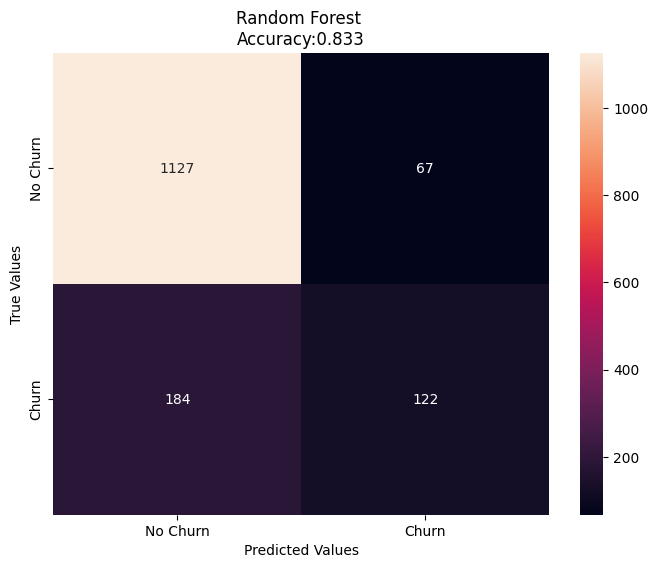

In [3]:
# ตัวอย่าง 9.9 Performance Metrics
## ทำต่อจากตัวอย่าง 9.8
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
                                    min_samples_split=7, random_state=0)
clf_random.fit(X_train[top5_features],y_train)

y_pred=clf_random.predict(X_test[top5_features])

target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names)) 

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,index=['No Churn','Churn'],columns=['No Churn',
                                                            'Churn']) 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6)) 
sns.heatmap(cm_df, annot=True,fmt='g') 
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                   y_pred))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show() 

#### ตัวอย่างที่ 9.10

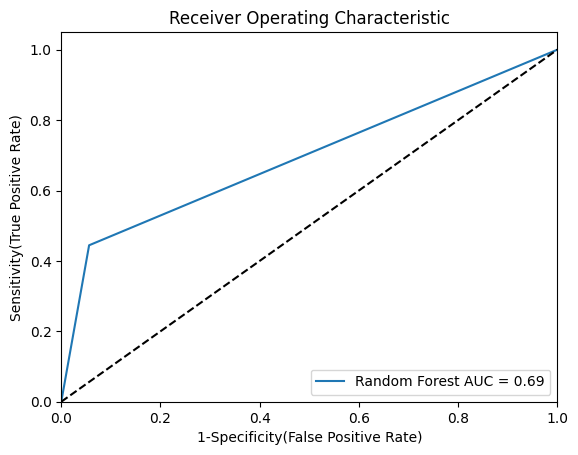

In [13]:
# ตัวอย่าง 9.10 ROC Curve
## ทำต่อจาก ตัวอย่าง 9.9
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
thresholds

plt.figure() 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % \
         ('Random Forest', roc_auc)) 
plt.plot([0, 1], [0, 1],'k--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.ylabel('Sensitivity(True Positive Rate)') 
plt.xlabel('1-Specificity(False Positive Rate)') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show() 

#### กิจกรรมที่ 9.3

In [ ]:
# กิจกรรม 9.3 Performance Metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
clf_random_grid = RandomForestClassifier(n_estimators=100, 
                                         max_depth=7,
                                         min_samples_split=10, 
                                         random_state=0) 
clf_random_grid.fit(X_train_scalar_combined, y_train)

y_pred=clf_random_grid.predict(X_test_scalar_combined)
target_names = ['No Churn', 'Churn']
print(classification_report(y_test,y_pred,target_names=target_names))

cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'],
                     columns = ['No Churn','Churn']) 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r') 
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show() 

from sklearn.metrics import roc_curve,auc
models = [
{
    'label': 'Logistic Regression',
    'model': clf_logistic,
},
{
    'label': 'SVM',
    'model': clf_svm,
},
{
    'label': 'Decision Tree',
    'model': clf_decision,
},
{
    'label': 'Random Forest Grid Search',
    'model': clf_random_grid,
}
]

for m in models:
    model = m['model']
    model.fit(X_train_scalar_combined, y_train)
    y_pred=model.predict(X_test_scalar_combined)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'],roc_auc)) 

plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.ylabel('Sensitivity(True Positive Rate)') 
plt.xlabel('1-Specificity(False Positive Rate)') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show() 